# BEE 4750 Lab 2: Uncertainty and Monte Carlo

**Name**: Akshara Chandrabalan

**ID**: ac2837

> **Due Date**
>
> Friday, 9/22/23, 9:00pm

## Setup

The following code should go at the top of most Julia scripts; it will
load the local package environment and install any needed packages. You
will see this often and shouldn’t need to touch it.

In [1]:
import Pkg
Pkg.activate(".")
Pkg.instantiate()

  Activating project at `~/Documents/BEE 5750 /lab-02-akshara-c`


In [2]:
using Random # random number generation
using Distributions # probability distributions and interface
using Statistics # basic statistical functions, including mean
using Plots # plotting

## Introduction

In this lab, you will use Monte Carlo analysis to estimate the expected
winnings for a couple of different games of chance.

Monte Carlo methods involve the simulation of random numbers from
probability distributions. In an environmental context, we often
propagate these random numbers through some more complicated model and
then compute a resulting statistic which is relevant for assessing
performance or risk, such as an average outcome or a particular
quantile.

Julia provides a common interface for probability distributions with the
[`Distributions.jl`
package](https://juliastats.org/Distributions.jl/stable/). The basic
workflow for sampling from a distribution is:

1.  Set up the distribution. The specific syntax depends on the
    distribution and what parameters are required, but the general call
    is the similar. For a normal distribution or a uniform distribution,
    the syntax is

    ``` julia
    # you don't have to name this "normal_distribution"
    # μ is the mean and σ is the standard deviation
    normal_distribution = Normal(μ, σ)
    # a is the upper bound and b is the lower bound; these can be set to +Inf or -Inf for an unbounded distribution in one or both directions.
    uniform_distribution = Uniform(a, b)
    ```

    There are lots of both
    [univariate](https://juliastats.org/Distributions.jl/stable/univariate/#Index)
    and
    [multivariate](https://juliastats.org/Distributions.jl/stable/multivariate/)
    distributions, as well as the ability to create your own, but we
    won’t do anything too exotic here.

2.  Draw samples. This uses the `rand()` command (which, when used
    without a distribution, just samples uniformly from the interval
    $[0, 1]$.) For example, to sample from our normal distribution
    above:

    ``` julia
    # draw n samples
    rand(normal_distribution, n)
    ```

Putting this together, let’s say that we wanted to simulate 100
six-sided dice rolls. We could use a [Discrete Uniform
distribution](https://juliastats.org/Distributions.jl/stable/univariate/#Distributions.DiscreteUniform).

In [3]:
dice_dist = DiscreteUniform(1, 6) # can generate any integer between 1 and 6
dice_rolls = rand(dice_dist, 100) # simulate rolls

100-element Vector{Int64}:
 1
 5
 5
 4
 6
 2
 5
 3
 2
 3
 ⋮
 6
 1
 5
 2
 2
 5
 5
 1
 4

And then we can plot a histogram of these rolls:

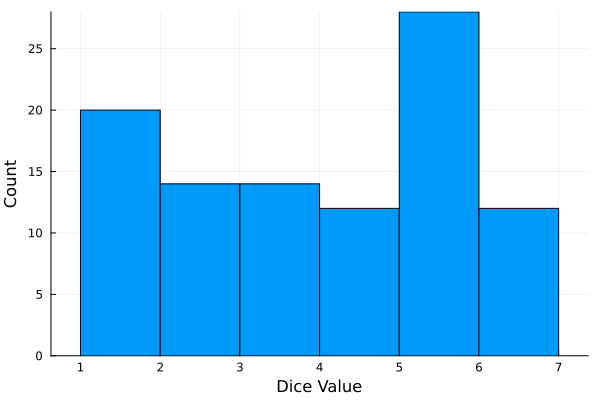

In [4]:
histogram(dice_rolls, legend=:false, bins=6)
ylabel!("Count")
xlabel!("Dice Value")

**Remember to**:

-   Evaluate all of your code cells, in order (using a `Run All`
    command). This will make sure all output is visible and that the
    code cells were evaluated in the correct order.
-   Tag each of the problems when you submit to Gradescope; a 10%
    penalty will be deducted if this is not done.

## Exercises (10 points)

In Problem 1, you will compute the probability of getting a specific
combination of multiple dice rolls. The focus will be on understanding
how the Monte Carlo estimate changes based on the number of simulations.

In Problem 2, we will implement the culmination of every episode of the
long-running game show [The Price Is
Right](https://en.wikipedia.org/wiki/The_Price_Is_Right): the
[Showcase](https://en.wikipedia.org/wiki/The_Price_Is_Right#Showcase).
You will be asked to make a plot of expected winnings by bid for a
particular distribution of prize values.

You should always start any computing with random numbers by setting a
“seed,” which controls the sequence of numbers which are generated
(since these are not *really* random, just “pseudorandom”). In Julia, we
do this with the `Random.seed!()` function.

``` julia
Random.seed!(1)
```

    TaskLocalRNG()

It doesn’t matter what seed you set, though different seeds might result
in slightly different values. But setting a seed means every time your
notebook is run, the answer will be the same.

> **Seeds and Reproducing Solutions**
>
> If you don’t re-run your code in the same order or if you re-run the
> same cell repeatedly, you will not get the same solution. If you’re
> working on a specific problem, you might want to re-use
> `Random.seed()` near any block of code you want to re-evaluate
> repeatedly.

### Problem 1 (5 points)

We want to know the probability of getting at least an 11 from rolling
three fair, six-sided dice (this is actually an old Italian game called
*passadieci*, which was analyzed by Galileo as one of the first examples
of a rigorous study of probability).

#### Problem 1.1 (1 point)

Write a function called `passadieci()` to simulate this game, which will
take as an input the number of realizations and output a vector of the
sum of the three dice rolls for each realization.

In [20]:
Random.seed!(1)

function passadieci(x)
    output = [] # each element will be the result (sum) of 1 realization

    for i = 1:x # x represents the number of realizations/trials
        dice_dist = DiscreteUniform(1, 6) # can generate any integer between 1 and 6
        dice_rolls = rand(dice_dist, 3) # simulate rolls
        sum = dice_rolls[1] + dice_rolls[2] + dice_rolls[3]
        append!(output, sum)
    end
    
    return (output)
end

# testing function
@show passadieci(4);


passadieci(4) = Any[9, 12, 15, 9]


### Problem 1.2 (2 points)

Generate 5,000 simulations of the game using your `passadieci()`
function. Plot how the computed probability of winning the game changes
as the number of simulations increases (you can do this by computing the
frequency of wins for each additional simulation).

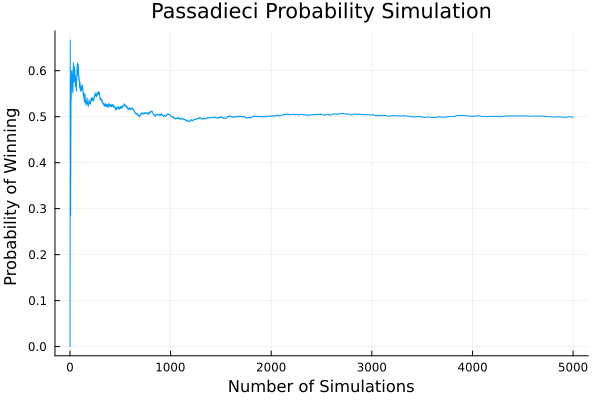

In [15]:
Random.seed!(1)

win_prob = []
result = passadieci(5000) # an array of the result of 5000 simulations of the game

for i = 1:length(result) # iteratively increasing sample size 
    win_count = 0
    for e = 1:i # checking if each sum in the result array of size i is greater than or equal to 11 
        if result[e] >= 11
            win_count += 1
        end
    end
    win_freq = win_count/i
    append!(win_prob, win_freq)
end

num_simulation = collect(1:5000) # x-axis values; creating an array with values ranging from 1 to 5000, default step is 1
plot(num_simulation, win_prob, legend = false)
xlabel!("Number of Simulations")
ylabel!("Probability of Winning ")
title!("Passadieci Probability Simulation")


### Problem 1.3 (2 point)

Based on your plot from Problem 1.2, how many simulations were needed
for the win probability estimate to converge? What did you notice from
your plot about the estimates prior to convergence?

ANSWER: Around 1200 simulations were needed for the win probability estimate to converge. This follows the Law of Large Numbers which states that as the number of simulations increases, the observed win probability gets closer and closer to the long-term expected win probability. Prior to convergence the win probability fluctuates more widely and there is greater uncertainty because when you have a smaller number of simulations, the outcome of each roll has a larger effect on the win probability, so the fluctuations are more drastic and varied.    

## Problem 2 (5 points)

The Showcase is the final round of every episode of The Price is Right,
matching the two big winners from the episode. Each contestant is shown
a “showcase” of prizes, which are usually some combination of a trip, a
motor vehicle, some furniture, and maybe some other stuff. They then
each have to make a bid on the retail price of the showcase. The rules
are:

-   an overbid is an automatic loss;
-   the contest who gets closest to the retail price wins their
    showcase;
-   if a contestant gets within \$250 of the retail price and is closer
    than their opponent, they win both showcases.

Your goal is to find a wager which maximizes your expected winnings,
which we may as well call utility, based on your assessment of the
probability of your showcase retail price. We’ll assume that the
distribution of all showcases offered by the show is given as truncated
normal distribution, which means a normal distribution which has an
upper and/or lower bound. `Distributions.jl` makes it easy to specify
truncations on any distribution, not just normal distributions. For
example, we’ll use this distribution for the showcase values:

``` julia
showcase_dist = truncated(Normal(31000, 4500), lower=5000, upper=42000)
```

    Truncated(Normal{Float64}(μ=31000.0, σ=4500.0); lower=5000.0, upper=42000.0)

#### Problem 2.1 (3 points) 

Write a function `showcase()` which takes in a bid value and uses Monte
Carlo simulation to compute the expected value of the winnings. Make the
following assumptions about your expected winnings if you don’t overbid:

-   If you win both showcases, the value is the double of the single
    showcase value.
-   If you did not win both showcases but bid under the showcase value,
    the probability of being outbid increases linearly as the distance
    between your bid and the value increases (in other words, if you bid
    the exact value, you win with probability 1, and if you bid \$0, you
    win with probability 0).

How did you decide how many samples to use within the function?

In [36]:
Random.seed!(1)

function showcase(bid_val)
    exp_winnings = 0
    n = 6000 # sample size
    
    showcase_dist = truncated(Normal(31000, 4500), lower = 5000, upper = 42000)
    showcase_val = rand(showcase_dist, n) # extracting n number of showcase values (instances) we want to simulate for

    for i = 1:length(showcase_val) # computing expected winnings for n number of showcase values
        if bid_val > showcase_val[i] # case 1: you overbid so your expected winnings is $0
            exp_winnings += 0
        elseif bid_val >= (showcase_val[i]-250) # case 2: you underbid within $250 of the actual showcase value
            exp_winnings += 2 * showcase_val[i] 
        else # case 3: you underbid by more than $250 so your expected winnings is a probability-weighted fraction of the showcase value
            prob_win = 1 - ((showcase_val[i] - bid_val) / showcase_val[i])
            exp_winnings += prob_win * showcase_val[i] 
        end
    end
    avg_exp_winnings = exp_winnings/n # gives the average expected winnings for a given bid value
    return avg_exp_winnings
end

showcase (generic function with 1 method)

ANSWER: I started with 1000 samples and kept increasing by 1000 until the fluctuation width, based on the plot in the next section, was within $200. I determined that a maximum difference of $200 in the expected winnings for a specific bid value was an amount that an average player would be okay with, but this is subjective from player to player. Although increasing the number of samples would provide more accuracy and less uncertainty/standard error, there is a tradeoff with computation time. The visual difference in fluctuation width between the graph using 6000 samples versus 7000 samples was not noticeable, so I stuck with 6000 samples.   

#### Problem 2.2 (2 points) 

Plot the expected winnings for bids ranging from \$0 to \$42,000. What
do you notice?

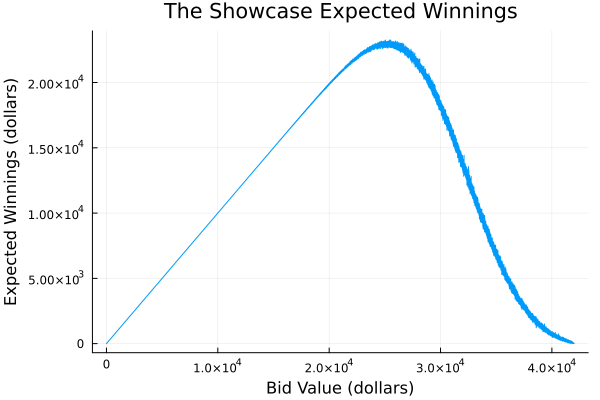

In [37]:
y = []
for bid = 0:42000
    exp_win = showcase(bid)
    append!(y, exp_win)
end

x = collect(0:42000)
plot(x, y, legend = false)
xlabel!("Bid Value (dollars)")
ylabel!("Expected Winnings (dollars)")
title!("The Showcase Expected Winnings")


ANSWER: A bid value of roughly $25,000 would maximize your expected winnings. As your bid value increases above $25,000, expected winnings decreases becuase you become more likely to overbid. At a bid value of $42,000, expected winnings converge to 0 because the maximum value of the showcase is $42,000, so any bid above that would automatically mean you overbid. From a bid value of 0 to $25,000, your expected winnings increases linearly because it is proportional to the win probaility, which also increases linearly, and with lower bids the chances of overbidding are low, so you are more likely to win atleast one showcase.   

## References

Put any consulted sources here, including classmates you worked with/who
helped you.

FlexBooks. (2023, may 8). *15.2 Expected Value and Payoffs*. https://flexbooks.ck12.org/cbook/ck-12-precalculus-concepts-2.0/section/15.2/primary/lesson/expected-value-and-payoffs-pcalc/

Srikrishnan, V. (2023). *Lecture 11: Why Monte Carlo Works*. BEE 4750/5750 Environmental Systems Analysis. https://viveks.me/environmental-systems-analysis/slides/lecture05-2.html#/title-slide

Ed Posts:
- Post Title: Lab 2 #2, Thread Number: 43

Consulted with Christine and Lesedi.